In [16]:
from matplotlib import pyplot as plt
import cv2
import os

error: OpenCV(4.1.0) C:\projects\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:662: error: (-2:Unspecified error) could not find a writer for the specified extension in function 'cv::imwrite_'


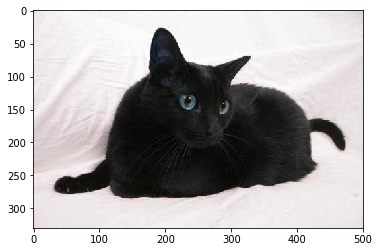

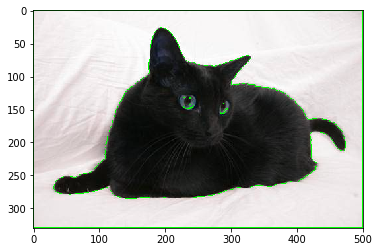

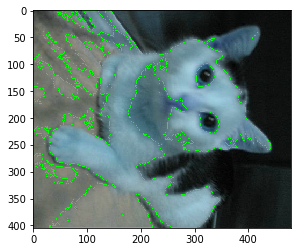

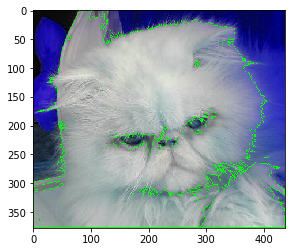

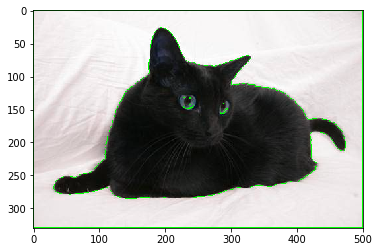

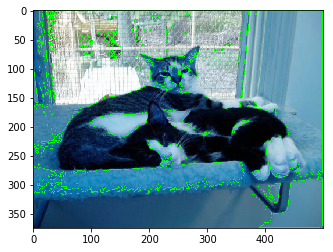

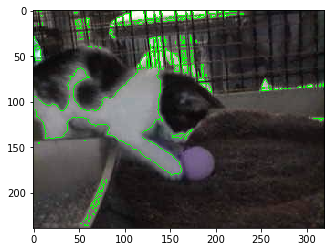

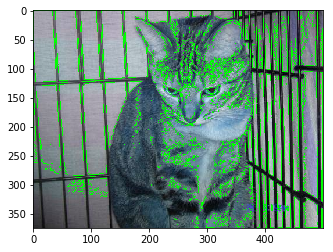

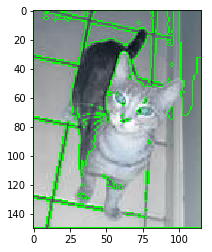

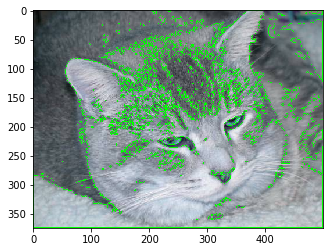

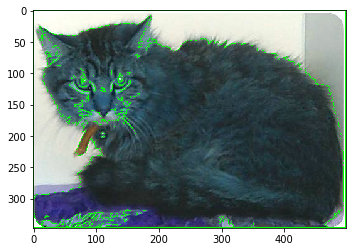

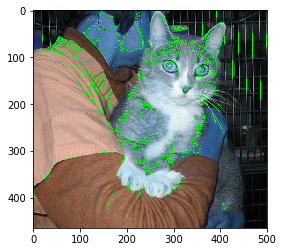

In [46]:
images=[]
images=load_images_from_folder('cats')
plt.imshow(images[2])
draw_contours(images[2])
c_images=contours(images)
save_images('cats1/',c_images)

In [18]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [30]:
def draw_contours(img):
    imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(imgray, 120,255,cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    c_img = cv2.drawContours(img, contours, -1, (0, 255, 0), 1)
    return c_img
    

In [32]:
def contours(images):
    c_imgs=[]
    for image in images:
        c_img=draw_contours(image)
        c_imgs.append(c_img)
    return c_imgs

In [45]:
def save_images(output,imgs):
    i=0
    for img in imgs:
        cv2.imwrite(os.path.join(output,str(i)+'.jpg'),img)
        i+=1